## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.1, 0.5, 0.9]
redice_lr_patient = [2, 5, 10]

In [8]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.10, reduce_patient: 2




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normaliz

50000/50000 [==============================] - 3s 63us/step - loss: 1.0760 - acc: 0.6334 - val_loss: 1.4399 - val_acc: 0.4964
Numbers of exp: 1, reduce_factor: 0.10, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)   

Epoch 13/25
50000/50000 [==============================] - 3s 63us/step - loss: 2.2311 - acc: 0.2587 - val_loss: 2.2287 - val_acc: 0.2593
Epoch 14/25
50000/50000 [==============================] - 3s 64us/step - loss: 2.2108 - acc: 0.2645 - val_loss: 2.2111 - val_acc: 0.2602
Epoch 15/25
50000/50000 [==============================] - 3s 64us/step - loss: 2.1932 - acc: 0.2689 - val_loss: 2.1950 - val_acc: 0.2652
Epoch 16/25
50000/50000 [==============================] - 3s 64us/step - loss: 2.1770 - acc: 0.2738 - val_loss: 2.1799 - val_acc: 0.2683
Epoch 17/25
50000/50000 [==============================] - 3s 63us/step - loss: 2.1608 - acc: 0.2772 - val_loss: 2.1652 - val_acc: 0.2708
Epoch 18/25
50000/50000 [==============================] - 3s 64us/step - loss: 2.1460 - acc: 0.2794 - val_loss: 2.1526 - val_acc: 0.2736
Epoch 19/25
50000/50000 [==============================] - 3s 64us/step - loss: 2.1320 - acc: 0.2830 - val_loss: 2.1391 - val_acc: 0.2762
Epoch 20/25
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 4s 87us/step - loss: 3.0314 - acc: 0.0994 - val_loss: 2.9439 - val_acc: 0.1131
Epoch 2/25
50000/50000 [==============================] - 3s 66us/step - loss: 2.8697 - acc: 0.1207 - val_loss: 2.8242 - val_acc: 0.1453
Epoch 3/25
50000/50000 [==============================] - 3s 60us/step - loss: 2.7296 - acc: 0.1482 - val_loss: 2.7243 - val_acc: 0.1657
Epoch 4/25
50000/50000 [==============================] - 3s 68us/step - loss: 2.6305 - acc: 0.1703 - val_loss: 2.6374 - val_acc: 0.1808
Epoch 5/25
50000/50000 [==============================] - 4s 75us/step - loss: 2.5568 - acc: 0.1870 - val_loss: 2.5595 - val_acc: 0.1947
Epoch 6/25
50000/50000 [==============================] - 3s 63us/step - loss: 2.4989 - acc: 0.2002 - val_loss: 2.4976 - val_acc: 0.2068
Epoch 7/25
50000/50000 [==============================] - 3s 65us/step - loss: 2.4507 - acc: 0.2097 - val_loss: 2.4463 - val_acc

50000/50000 [==============================] - 3s 63us/step - loss: 2.0849 - acc: 0.2921 - val_loss: 2.1287 - val_acc: 0.2750
Epoch 25/25
50000/50000 [==============================] - 3s 63us/step - loss: 2.0755 - acc: 0.2939 - val_loss: 2.1190 - val_acc: 0.2792
Numbers of exp: 6, reduce_factor: 0.90, reduce_patient: 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_19 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizatio

50000/50000 [==============================] - 3s 64us/step - loss: 2.2866 - acc: 0.2420 - val_loss: 2.3125 - val_acc: 0.2351
Epoch 12/25
50000/50000 [==============================] - 3s 63us/step - loss: 2.2643 - acc: 0.2484 - val_loss: 2.2895 - val_acc: 0.2400
Epoch 13/25
50000/50000 [==============================] - 3s 64us/step - loss: 2.2428 - acc: 0.2528 - val_loss: 2.2694 - val_acc: 0.2461
Epoch 14/25
50000/50000 [==============================] - 3s 64us/step - loss: 2.2230 - acc: 0.2580 - val_loss: 2.2504 - val_acc: 0.2482
Epoch 15/25
50000/50000 [==============================] - 3s 64us/step - loss: 2.2043 - acc: 0.2613 - val_loss: 2.2339 - val_acc: 0.2512
Epoch 16/25
50000/50000 [==============================] - 3s 64us/step - loss: 2.1875 - acc: 0.2664 - val_loss: 2.2173 - val_acc: 0.2569
Epoch 17/25
50000/50000 [==============================] - 3s 64us/step - loss: 2.1712 - acc: 0.2708 - val_loss: 2.2017 - val_acc: 0.2596
Epoch 18/25
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 5s 109us/step - loss: 1.7884 - acc: 0.3814 - val_loss: 1.9065 - val_acc: 0.3678
Epoch 2/25
50000/50000 [==============================] - 3s 67us/step - loss: 1.4814 - acc: 0.4771 - val_loss: 1.7431 - val_acc: 0.3964
Epoch 3/25
50000/50000 [==============================] - 3s 68us/step - loss: 1.3735 - acc: 0.5124 - val_loss: 2.7258 - val_acc: 0.2476
Epoch 4/25
50000/50000 [==============================] - 3s 68us/step - loss: 1.2929 - acc: 0.5425 - val_loss: 1.8357 - val_acc: 0.3859

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/25
50000/50000 [==============================] - 3s 67us/step - loss: 1.1770 - acc: 0.5894 - val_loss: 1.4479 - val_acc: 0.4848
Epoch 6/25
50000/50000 [==============================] - 3s 68us/step - loss: 1.1393 - acc: 0.6054 - val_loss: 1.3843 - val_acc: 0.5080
Epoch 7/25
50000/50000 [=====================

50000/50000 [==============================] - 3s 68us/step - loss: 2.9874 - acc: 0.1131 - val_loss: 2.9867 - val_acc: 0.1120
Epoch 21/25
50000/50000 [==============================] - 3s 68us/step - loss: 2.9883 - acc: 0.1120 - val_loss: 2.9867 - val_acc: 0.1120
Epoch 22/25
50000/50000 [==============================] - 3s 68us/step - loss: 2.9888 - acc: 0.1114 - val_loss: 2.9867 - val_acc: 0.1118
Epoch 23/25
50000/50000 [==============================] - 3s 68us/step - loss: 2.9887 - acc: 0.1126 - val_loss: 2.9866 - val_acc: 0.1119
Epoch 24/25
50000/50000 [==============================] - 3s 68us/step - loss: 2.9879 - acc: 0.1125 - val_loss: 2.9866 - val_acc: 0.1120
Epoch 25/25
50000/50000 [==============================] - 3s 68us/step - loss: 2.9884 - acc: 0.1123 - val_loss: 2.9866 - val_acc: 0.1118
Numbers of exp: 11, reduce_factor: 0.10, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Par

50000/50000 [==============================] - 3s 70us/step - loss: 3.0520 - acc: 0.1046 - val_loss: 3.0483 - val_acc: 0.1097
Epoch 8/25
50000/50000 [==============================] - 3s 68us/step - loss: 3.0522 - acc: 0.1055 - val_loss: 3.0479 - val_acc: 0.1095
Epoch 9/25
50000/50000 [==============================] - 3s 68us/step - loss: 3.0519 - acc: 0.1058 - val_loss: 3.0478 - val_acc: 0.1098
Epoch 10/25
50000/50000 [==============================] - 3s 69us/step - loss: 3.0508 - acc: 0.1057 - val_loss: 3.0480 - val_acc: 0.1098

Epoch 00010: ReduceLROnPlateau reducing learning rate to 5.000000413701855e-10.
Epoch 11/25
50000/50000 [==============================] - 3s 69us/step - loss: 3.0517 - acc: 0.1047 - val_loss: 3.0479 - val_acc: 0.1096
Epoch 12/25
50000/50000 [==============================] - 3s 69us/step - loss: 3.0523 - acc: 0.1052 - val_loss: 3.0479 - val_acc: 0.1096

Epoch 00012: ReduceLROnPlateau reducing learning rate to 2.5000002068509275e-10.
Epoch 13/25
50000/50000

50000/50000 [==============================] - 3s 69us/step - loss: 3.0733 - acc: 0.1022 - val_loss: 3.0756 - val_acc: 0.0988
Numbers of exp: 14, reduce_factor: 0.50, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_43 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_44 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense) 

50000/50000 [==============================] - 3s 69us/step - loss: 3.1311 - acc: 0.1012 - val_loss: 3.1348 - val_acc: 0.0997
Epoch 13/25
50000/50000 [==============================] - 3s 69us/step - loss: 3.1296 - acc: 0.1001 - val_loss: 3.1351 - val_acc: 0.0997
Epoch 14/25
50000/50000 [==============================] - 3s 69us/step - loss: 3.1309 - acc: 0.1007 - val_loss: 3.1349 - val_acc: 0.0996
Epoch 15/25
50000/50000 [==============================] - 3s 70us/step - loss: 3.1307 - acc: 0.1007 - val_loss: 3.1349 - val_acc: 0.0998
Epoch 16/25
50000/50000 [==============================] - 3s 69us/step - loss: 3.1313 - acc: 0.1001 - val_loss: 3.1350 - val_acc: 0.0997
Epoch 17/25
50000/50000 [==============================] - 3s 70us/step - loss: 3.1320 - acc: 0.1005 - val_loss: 3.1353 - val_acc: 0.0996
Epoch 18/25
50000/50000 [==============================] - 3s 70us/step - loss: 3.1305 - acc: 0.1000 - val_loss: 3.1352 - val_acc: 0.0997
Epoch 19/25
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 7s 142us/step - loss: 3.2008 - acc: 0.0971 - val_loss: 3.1792 - val_acc: 0.0957
Epoch 2/25
50000/50000 [==============================] - 3s 69us/step - loss: 3.1996 - acc: 0.0976 - val_loss: 3.1792 - val_acc: 0.0953
Epoch 3/25
50000/50000 [==============================] - 3s 69us/step - loss: 3.2016 - acc: 0.0979 - val_loss: 3.1789 - val_acc: 0.0955
Epoch 4/25
50000/50000 [==============================] - 3s 69us/step - loss: 3.2008 - acc: 0.0971 - val_loss: 3.1792 - val_acc: 0.0957
Epoch 5/25
50000/50000 [==============================] - 3s 70us/step - loss: 3.2017 - acc: 0.0977 - val_loss: 3.1791 - val_acc: 0.0955
Epoch 6/25
50000/50000 [==============================] - 3s 69us/step - loss: 3.2019 - acc: 0.0978 - val_loss: 3.1792 - val_acc: 0.0956
Epoch 7/25
50000/50000 [==============================] - 3s 69us/step - loss: 3.2006 - acc: 0.0971 - val_loss: 3.1791 - val_ac

50000/50000 [==============================] - 4s 79us/step - loss: 0.9509 - acc: 0.6759 - val_loss: 1.2907 - val_acc: 0.5429
Epoch 23/25
50000/50000 [==============================] - 4s 78us/step - loss: 0.9502 - acc: 0.6765 - val_loss: 1.2908 - val_acc: 0.5432

Epoch 00023: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.
Epoch 24/25
50000/50000 [==============================] - 4s 78us/step - loss: 0.9500 - acc: 0.6769 - val_loss: 1.2909 - val_acc: 0.5433
Epoch 25/25
50000/50000 [==============================] - 4s 78us/step - loss: 0.9511 - acc: 0.6759 - val_loss: 1.2909 - val_acc: 0.5432

Epoch 00025: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.
Numbers of exp: 19, reduce_factor: 0.10, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        (None, 3072)              0         
_________________________________________

Epoch 7/25
50000/50000 [==============================] - 3s 67us/step - loss: 3.0122 - acc: 0.1096 - val_loss: 3.0292 - val_acc: 0.1045
Epoch 8/25
50000/50000 [==============================] - 3s 67us/step - loss: 3.0122 - acc: 0.1094 - val_loss: 3.0294 - val_acc: 0.1045
Epoch 9/25
50000/50000 [==============================] - 3s 66us/step - loss: 3.0125 - acc: 0.1102 - val_loss: 3.0293 - val_acc: 0.1047
Epoch 10/25
50000/50000 [==============================] - 3s 66us/step - loss: 3.0133 - acc: 0.1091 - val_loss: 3.0291 - val_acc: 0.1046
Epoch 11/25
50000/50000 [==============================] - 3s 66us/step - loss: 3.0120 - acc: 0.1094 - val_loss: 3.0294 - val_acc: 0.1044
Epoch 12/25
50000/50000 [==============================] - 3s 66us/step - loss: 3.0127 - acc: 0.1093 - val_loss: 3.0294 - val_acc: 0.1045
Epoch 13/25
50000/50000 [==============================] - 3s 66us/step - loss: 3.0123 - acc: 0.1101 - val_loss: 3.0293 - val_acc: 0.1044
Epoch 14/25
50000/50000 [============

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 7s 149us/step - loss: 3.1133 - acc: 0.0876 - val_loss: 3.1096 - val_acc: 0.0820
Epoch 2/25
50000/50000 [==============================] - 3s 66us/step - loss: 3.1134 - acc: 0.0867 - val_loss: 3.1098 - val_acc: 0.0818
Epoch 3/25
50000/50000 [==============================] - 3s 67us/step - loss: 3.1128 - acc: 0.0871 - val_loss: 3.1097 - val_acc: 0.0818
Epoch 4/25
50000/50000 [==============================] - 3s 67us/step - loss: 3.1139 - acc: 0.0873 - val_loss: 3.1097 - val_acc: 0.0817
Epoch 5/25
50000/50000 [==============================] - 3s 66us/step - loss: 3.1137 - acc: 0.0868 - val_loss: 3.1096 - val_acc: 0.0818
Epoch 6/25
50000/50000 [==============================] - 4s 77us/step - loss: 3.1135 - acc: 0.0871 - val_loss: 3.1096 - val_acc: 0.0818
Epoch 7/25
50000/50000 [==============================] - 3s 68us/step - loss: 3.1139 - acc: 0.0870 - val_loss: 3.1096 - val_ac

50000/50000 [==============================] - 3s 66us/step - loss: 3.0411 - acc: 0.1030 - val_loss: 3.0200 - val_acc: 0.1022
Epoch 25/25
50000/50000 [==============================] - 3s 66us/step - loss: 3.0406 - acc: 0.1017 - val_loss: 3.0196 - val_acc: 0.1023
Numbers of exp: 24, reduce_factor: 0.90, reduce_patient: 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_73 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizati

Epoch 12/25
50000/50000 [==============================] - 3s 67us/step - loss: 3.1372 - acc: 0.0991 - val_loss: 3.1359 - val_acc: 0.1044
Epoch 13/25
50000/50000 [==============================] - 3s 67us/step - loss: 3.1361 - acc: 0.0996 - val_loss: 3.1358 - val_acc: 0.1045
Epoch 14/25
50000/50000 [==============================] - 3s 67us/step - loss: 3.1375 - acc: 0.0998 - val_loss: 3.1353 - val_acc: 0.1046
Epoch 15/25
50000/50000 [==============================] - 3s 67us/step - loss: 3.1370 - acc: 0.0996 - val_loss: 3.1354 - val_acc: 0.1044
Epoch 16/25
50000/50000 [==============================] - 3s 67us/step - loss: 3.1365 - acc: 0.0998 - val_loss: 3.1355 - val_acc: 0.1045
Epoch 17/25
50000/50000 [==============================] - 3s 67us/step - loss: 3.1355 - acc: 0.0993 - val_loss: 3.1360 - val_acc: 0.1043
Epoch 18/25
50000/50000 [==============================] - 3s 67us/step - loss: 3.1357 - acc: 0.1002 - val_loss: 3.1358 - val_acc: 0.1043
Epoch 19/25
50000/50000 [=========

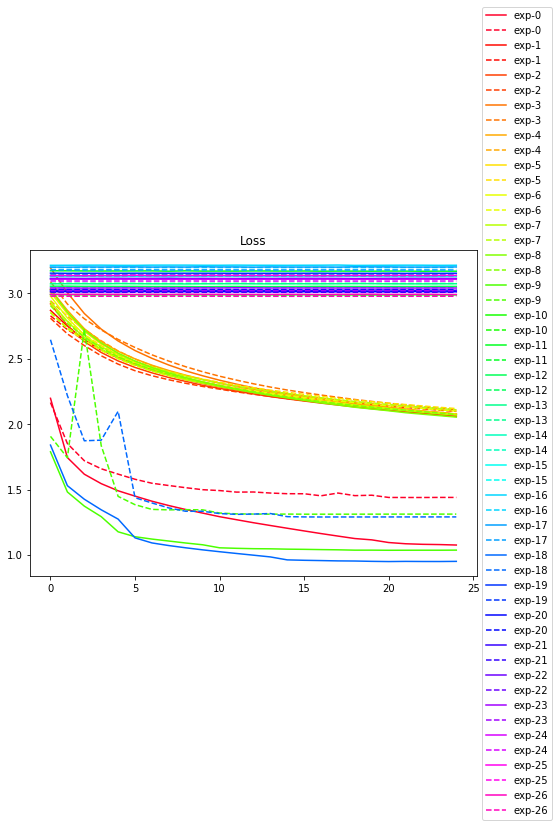

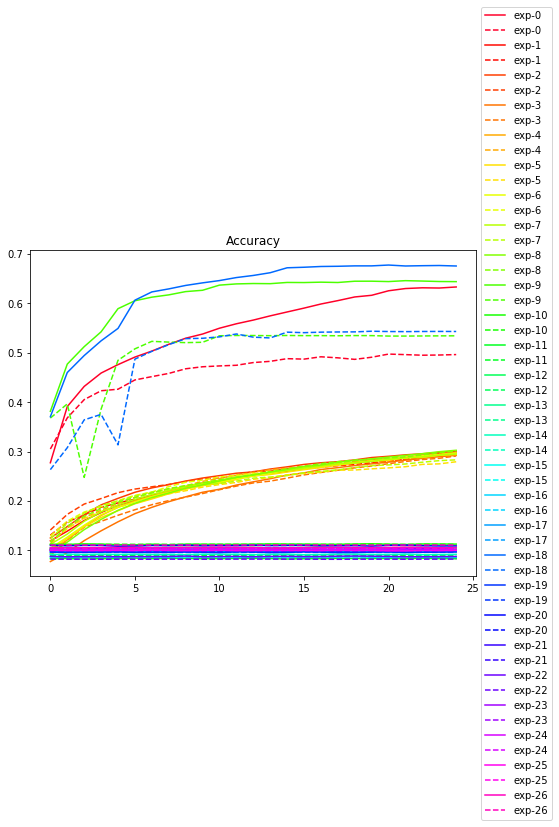

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()